
Which Model can give us the highest accuracy with the number of epochs and CNN + dense layers remaining constant?

The fifth model: CNN model with dropout, max pooling, batch normalization, and L1 AND L2 regularization.


In [1]:
# mount gdrive 
#small dataset sample stored in my drive 
from google.colab import drive
drive.mount('/content/drive')
#below where the file is in gdrive, change with your
data_path = "/content/drive/My Drive/"

Mounted at /content/drive


In [2]:
# import packages
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Flatten, MaxPooling2D, BatchNormalization
from keras.layers import Conv2D
from keras import layers
from keras import regularizers
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from math import ceil
import numpy as np
from IPython.display import display
from PIL import Image

In [3]:
#load data with shuffle and non-shuffle flows 
batch_size = 32

data = ImageDataGenerator(rescale=1. / 255, 
                          validation_split=0.2)

training_data = data.flow_from_directory('/content/drive/My Drive/archive/images/Images', 
                                         target_size=(200, 200), shuffle=True, batch_size = batch_size, 
                                         class_mode='categorical', subset='training')

training_data_noshuffle = data.flow_from_directory('/content/drive/My Drive/archive/images/Images', 
                                         target_size=(200, 200), shuffle=False, batch_size = batch_size, 
                                         class_mode='categorical', subset='training')

test_data = data.flow_from_directory('/content/drive/My Drive/archive/images/Images', 
                                     target_size=(200, 200), batch_size = batch_size, shuffle=False,
                                     class_mode='categorical', subset='validation')

numClasses = 120

Found 16604 images belonging to 120 classes.
Found 16604 images belonging to 120 classes.
Found 4096 images belonging to 120 classes.


# Model 5

In [4]:
import time
start_time = time.time()

In [5]:
#model 5 -- dropout, BN, pooling, L1 & L2 reg
model_5=Sequential()
model_5.add(Conv2D(16, kernel_size=(5, 5), input_shape=(200, 200, 3)))
model_5.add(BatchNormalization())
model_5.add(Activation('relu'))
model_5.add(MaxPooling2D(pool_size=(2,2)))
model_5.add(Dropout(0.5))
               
model_5.add(Conv2D(64, kernel_size=(3, 3)))
model_5.add(BatchNormalization())
model_5.add(Activation('relu'))
model_5.add(MaxPooling2D(pool_size=(2,2)))
model_5.add(Dropout(0.5))

model_5.add(Conv2D(128, kernel_size=(3, 3)))
model_5.add(BatchNormalization())
model_5.add(Activation('relu'))
model_5.add(MaxPooling2D(pool_size=(2,2)))
model_5.add(Dropout(0.5))
model_5.add(Flatten())

 
model_5.add(Dense(200, kernel_regularizer='l1_l2', activation='relu'))
model_5.add(Dense(175, kernel_regularizer='l1_l2', activation='relu'))
model_5.add(Dense(150, kernel_regularizer='l1_l2', activation='relu'))
model_5.add(Dense(numClasses, activation='softmax'))

In [6]:
#compile and train
MyEpochs = 50
opt = keras.optimizers.Adam(learning_rate=0.01)

model_5.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=opt, 
              metrics=['accuracy']) 

model_5.fit(training_data,
                        batch_size = 32,
                        epochs = MyEpochs,
                        validation_data=test_data,
                        shuffle = 1)

Epoch 1/50
519/519 [==============================] - 11954s 23s/step - loss: 186.8327 - accuracy: 0.0095 - val_loss: 159.5589 - val_accuracy: 0.0115
Epoch 2/50
519/519 [==============================] - 94s 182ms/step - loss: 160.9921 - accuracy: 0.0123 - val_loss: 161.2592 - val_accuracy: 0.0122
Epoch 3/50
519/519 [==============================] - 94s 181ms/step - loss: 160.9727 - accuracy: 0.0116 - val_loss: 161.0849 - val_accuracy: 0.0122
Epoch 4/50
519/519 [==============================] - 95s 183ms/step - loss: 161.0570 - accuracy: 0.0098 - val_loss: 161.3171 - val_accuracy: 0.0115
Epoch 5/50
519/519 [==============================] - 95s 182ms/step - loss: 161.1303 - accuracy: 0.0117 - val_loss: 159.9958 - val_accuracy: 0.0122
Epoch 6/50
519/519 [==============================] - 94s 181ms/step - loss: 161.1693 - accuracy: 0.0103 - val_loss: 161.0048 - val_accuracy: 0.0115
Epoch 7/50
519/519 [==============================] - 94s 182ms/step - loss: 161.2020 - accuracy: 0.0113 

In [7]:
#architecture of layers
model_5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 196, 196, 16)      1216      
                                                                 
 batch_normalization (BatchN  (None, 196, 196, 16)     64        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 196, 196, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 98, 98, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 98, 98, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 64)        9

In [8]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
#confusion matrix, accuracy, classification report 

training_data.reset()
test_data.reset()

predicted_scores = model_5.predict(test_data, verbose=1)
predicted_labels = predicted_scores.argmax(axis=1) 

test_labels = test_data.labels

print(test_labels)
print(predicted_labels)

acc_score = accuracy_score(test_labels, predicted_labels)
CFM = confusion_matrix(test_labels, predicted_labels)

print("\n", "Accuracy: " + str(format(acc_score,'.3f')))
print("\n", "CFM: \n", confusion_matrix(test_labels, predicted_labels))
print("\n", "Classification report: \n", classification_report(test_labels, predicted_labels))

128/128 [==============================] - 19s 145ms/step
[  0   0   0 ... 119 119 119]
[2 2 2 ... 2 2 2]

 Accuracy: 0.012

 CFM: 
 [[ 0  0 30 ...  0  0  0]
 [ 0  0 37 ...  0  0  0]
 [ 0  0 50 ...  0  0  0]
 ...
 [ 0  0 31 ...  0  0  0]
 [ 0  0 30 ...  0  0  0]
 [ 0  0 33 ...  0  0  0]]

 Classification report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.00      0.00      0.00        37
           2       0.01      1.00      0.02        50
           3       0.00      0.00      0.00        29
           4       0.00      0.00      0.00        42
           5       0.00      0.00      0.00        37
           6       0.00      0.00      0.00        39
           7       0.00      0.00      0.00        34
           8       0.00      0.00      0.00        34
           9       0.00      0.00      0.00        47
          10       0.00      0.00      0.00        35
          11       0.00      0.00  

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Model 5 Visuals

In [9]:
# Visual Specific Imports
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import (
    auc, 
    roc_curve,
    roc_auc_score,
)


ROC AUC score: 0.5


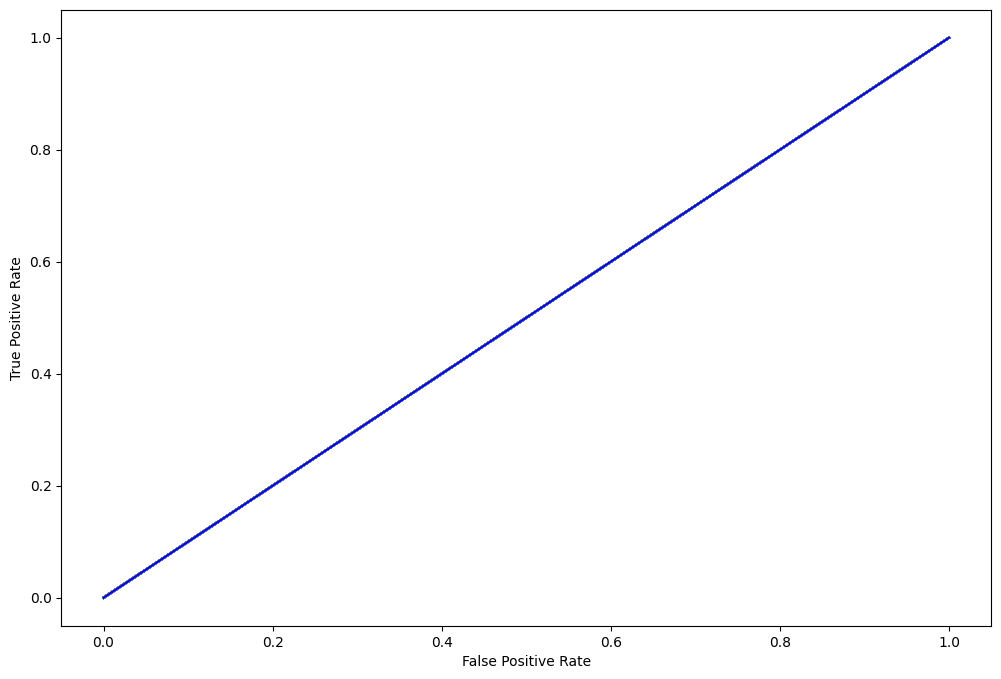

In [10]:
# add visualization here
target = list(test_data.class_indices.keys())

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))
# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    auc_list = []
    auc_results_dict = {}

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
        
        auc_list += [auc(fpr, tpr)]

    # Create auc_results_df
    auc_results_dict['Breed'] = target
    auc_results_dict['AUC'] = auc_list
    index = range(len(auc_results_dict['Breed']))
    auc_results_df = pd.DataFrame(auc_results_dict, index=index)

    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')

    return roc_auc_score(y_test, y_pred, average=average), auc_results_df


# Set parameters here
roc_auc_score_result, auc_results_df = multiclass_roc_auc_score(test_labels, predicted_labels)
print('ROC AUC score:', round(roc_auc_score_result,2))

# c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

In [11]:
classification_report_dict = classification_report(test_labels, predicted_labels, output_dict=True)

macro_avgs = {}
for i in range(3):
    key, value = classification_report_dict.popitem()
    macro_avgs[key] = value

index = range(len(classification_report_dict))
classification_report_df = pd.DataFrame(classification_report_dict).T
classification_report_df.index = classification_report_df.index.astype('int64')

class_results_df = auc_results_df.join(classification_report_df).sort_values('f1-score', ascending=False)

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
df_macro_avgs = pd.DataFrame(macro_avgs).T.iloc[:2, :3]
print('Averages:')
display(round(df_macro_avgs,2))

Averages:


precision  recall  f1-score
weighted avg        0.0    0.01       0.0
macro avg           0.0    0.01       0.0

Top and Bottom 5 by AUC

In [13]:
print('Top 5 by AUC')
display(class_results_df.sort_values('AUC', ascending=False).head(5))
print('\n\nBottom 5 by AUC')
display(class_results_df.sort_values('AUC', ascending=True).head(5))

Top 5 by AUC


Breed  AUC  precision  recall  f1-score  support
2       n02085936-Maltese_dog  0.5   0.012207     1.0   0.02412     50.0
0         n02085620-Chihuahua  0.5   0.000000     0.0   0.00000     30.0
3          n02086079-Pekinese  0.5   0.000000     0.0   0.00000     29.0
4          n02086240-Shih-Tzu  0.5   0.000000     0.0   0.00000     42.0
5  n02086646-Blenheim_spaniel  0.5   0.000000     0.0   0.00000     37.0



Bottom 5 by AUC


Breed  AUC  precision  recall  f1-score  support
2       n02085936-Maltese_dog  0.5   0.012207     1.0   0.02412     50.0
4          n02086240-Shih-Tzu  0.5   0.000000     0.0   0.00000     42.0
5  n02086646-Blenheim_spaniel  0.5   0.000000     0.0   0.00000     37.0
6          n02086910-papillon  0.5   0.000000     0.0   0.00000     39.0
7       n02087046-toy_terrier  0.5   0.000000     0.0   0.00000     34.0

Top and Bottom 5 by F1-Score

In [14]:
print('Top 5 by F1-Score')
display(class_results_df.sort_values('f1-score', ascending=False).head(5))
print('\n\nBottom 5 by F1-Score')
display(class_results_df.sort_values('f1-score', ascending=True).head(5))

Top 5 by F1-Score


Breed  AUC  precision  recall  f1-score  support
2       n02085936-Maltese_dog  0.5   0.012207     1.0   0.02412     50.0
0         n02085620-Chihuahua  0.5   0.000000     0.0   0.00000     30.0
3          n02086079-Pekinese  0.5   0.000000     0.0   0.00000     29.0
4          n02086240-Shih-Tzu  0.5   0.000000     0.0   0.00000     42.0
5  n02086646-Blenheim_spaniel  0.5   0.000000     0.0   0.00000     37.0



Bottom 5 by F1-Score


Breed  AUC  precision  recall  f1-score  support
62      n02100877-Irish_setter  0.5        0.0     0.0       0.0     31.0
4           n02086240-Shih-Tzu  0.5        0.0     0.0       0.0     42.0
5   n02086646-Blenheim_spaniel  0.5        0.0     0.0       0.0     37.0
6           n02086910-papillon  0.5        0.0     0.0       0.0     39.0
7        n02087046-toy_terrier  0.5        0.0     0.0       0.0     34.0

In [15]:
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time:.2f} seconds")

Elapsed time: 16903.68 seconds
